## RF PatternTraces

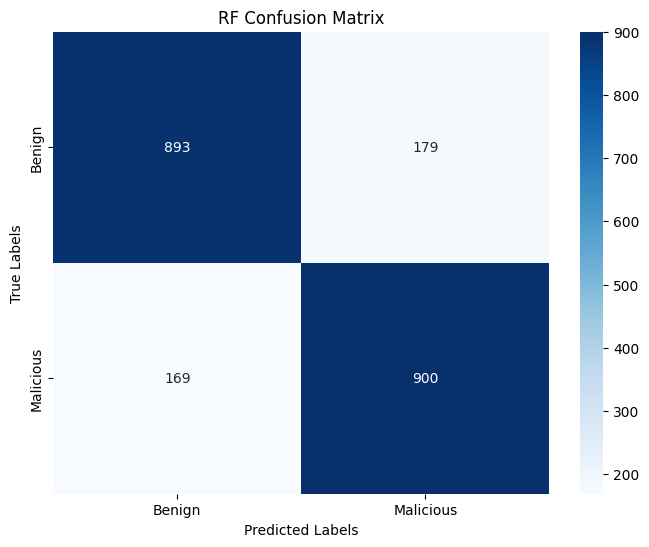

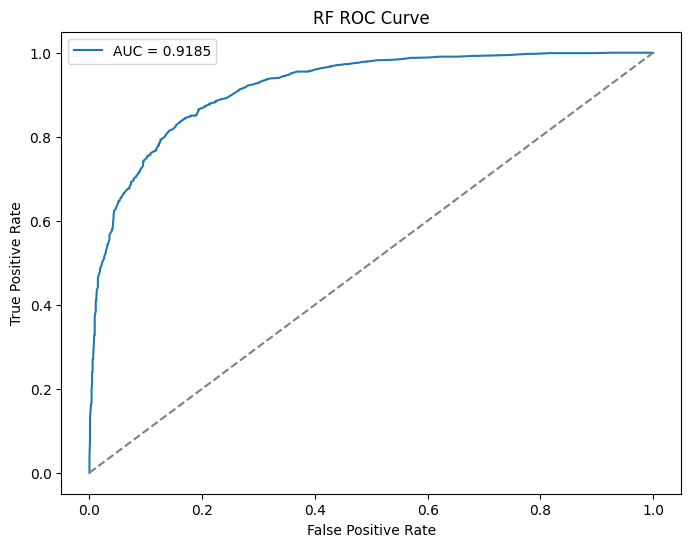

Train Accuracy: 0.98868756
Validation Accuracy: 0.84913592
Test Accuracy: 0.83745913
Precision: 0.83749071
Recall: 0.83745913
F1 Score: 0.83745665
ROC AUC: 0.91845933
Cohen's Kappa: 0.67492188
Training Time (s): 20.17818379
Validation Time (s): 0.07911730
Test Time (s): 0.08625221
Model saved at: RF_best_model_ngrams.pkl


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import (
    accuracy_score, confusion_matrix, roc_auc_score, roc_curve,
    precision_recall_fscore_support, cohen_kappa_score
)
import matplotlib.pyplot as plt
import seaborn as sns
import time
import joblib

# Load dataset
file_path = 'D:/Final Version/Step 14 CombinedTraces/CombinedDataset/FinalCombinedBenignMaliciousDataset-v2.csv'
data = pd.read_csv(file_path)

# Define all pattern columns including advanced patterns
all_pattern_columns = ['State_Transition_Counts',
                       'Unique_LADDR_Count',
                       'Unique_RADDR_Count',
                       'Unique_LPORT_Count',
                       'Unique_RPORT_Count'
                      ]

# Combining all pattern columns into a single text feature for N-gram analysis
data['Combined_Patterns'] = data[all_pattern_columns].fillna('').astype(str).agg(' '.join, axis=1)

# Target variable
X = data['Combined_Patterns']
y = data['Level']

# Applying N-gram feature extraction with bi-grams and tri-grams
vectorizer = CountVectorizer(ngram_range=(2, 3))
X_ngram = vectorizer.fit_transform(X)

# Split the data
X_train, X_temp, y_train, y_temp = train_test_split(X_ngram, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Initialize Random Forest model
rf_model = RandomForestClassifier(random_state=42, n_jobs=-1)

# Train the model and record training time
start_train_time = time.time()
rf_model.fit(X_train, y_train)
train_time = time.time() - start_train_time

# Predictions
y_train_pred = rf_model.predict(X_train)
y_val_pred = rf_model.predict(X_val)
y_test_pred = rf_model.predict(X_test)

# Calculate accuracies
train_acc = accuracy_score(y_train, y_train_pred)
val_acc = accuracy_score(y_val, y_val_pred)
test_acc = accuracy_score(y_test, y_test_pred)

# Calculate AUC for test set
y_test_prob = rf_model.predict_proba(X_test)[:, 1]
test_auc = roc_auc_score(y_test, y_test_prob)

# Confusion matrix and metrics
conf_matrix = confusion_matrix(y_test, y_test_pred)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_test_pred, average='weighted')
kappa = cohen_kappa_score(y_test, y_test_pred)

# Record validation and test times
start_val_time = time.time()
rf_model.predict(X_val)
val_time = time.time() - start_val_time

start_test_time = time.time()
rf_model.predict(X_test)
test_time = time.time() - start_test_time

# Save the model
model_path = 'RF_best_model_ngrams.pkl'
joblib.dump(rf_model, model_path)

# Visualizations and saving plots
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malicious'], yticklabels=['Benign', 'Malicious'])
plt.title('RF Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.savefig('RF Confusion Matrix.png')  # Save the plot
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_test_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {test_auc:.4f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('RF ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.savefig('RF ROC Curve.png')  # Save the plot
plt.show()

# Print metrics
metrics = {
    "Train Accuracy": train_acc,
    "Validation Accuracy": val_acc,
    "Test Accuracy": test_acc,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1,
    "ROC AUC": test_auc,
    "Cohen's Kappa": kappa,
    "Training Time (s)": train_time,
    "Validation Time (s)": val_time,
    "Test Time (s)": test_time,
}
for metric, value in metrics.items():
    print(f"{metric}: {value:.8f}")

print(f"Model saved at: {model_path}")

## DT PatternTraces

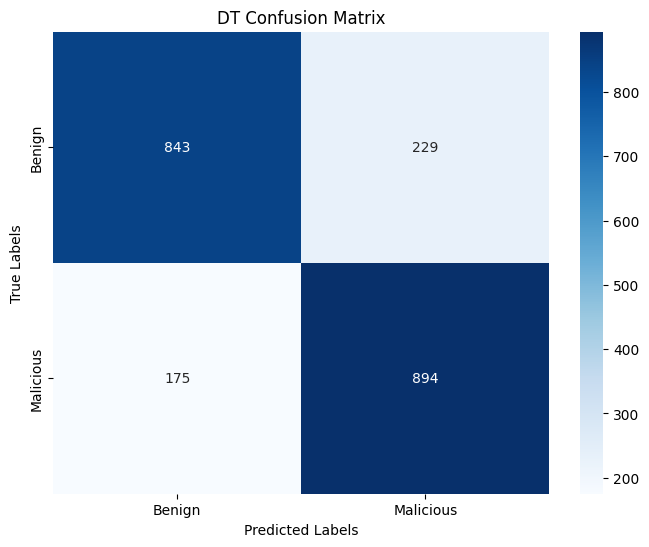

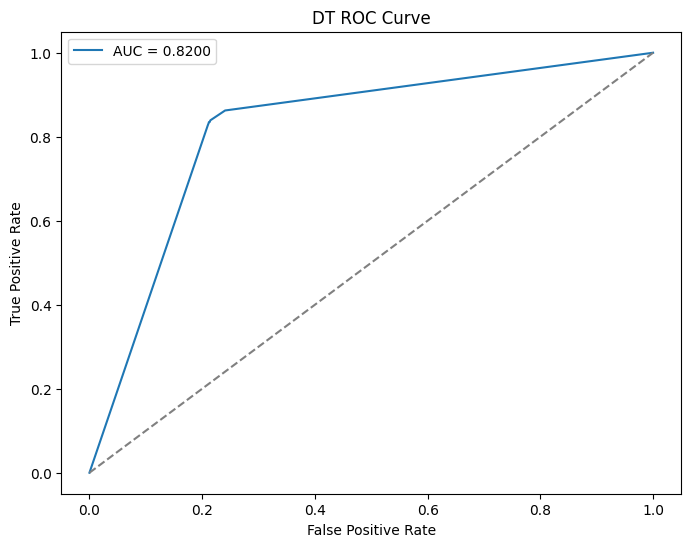

Train Accuracy: 0.98868756
Validation Accuracy: 0.82671649
Test Accuracy: 0.81130313
Precision: 0.81211054
Recall: 0.81130313
F1 Score: 0.81118970
ROC AUC: 0.82001286
Cohen's Kappa: 0.62263219
Training Time (s): 6.54927444
Validation Time (s): 0.00398946
Test Time (s): 0.00401139
Model saved at: DT_best_model_ngrams.pkl


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import (
    accuracy_score, confusion_matrix, roc_auc_score, roc_curve,
    precision_recall_fscore_support, cohen_kappa_score
)
import matplotlib.pyplot as plt
import seaborn as sns
import time
import joblib

# Load dataset
file_path = 'D:/Final Version/Step 14 CombinedTraces/CombinedDataset/FinalCombinedBenignMaliciousDataset-v2.csv'
data = pd.read_csv(file_path)

# Define all pattern columns including advanced patterns
all_pattern_columns = ['State_Transition_Counts',
                       'Unique_LADDR_Count',
                       'Unique_RADDR_Count',
                       'Unique_LPORT_Count',
                       'Unique_RPORT_Count'
                      ]

# Combining all pattern columns into a single text feature for N-gram analysis
data['Combined_Patterns'] = data[all_pattern_columns].fillna('').astype(str).agg(' '.join, axis=1)

# Target variable
X = data['Combined_Patterns']
y = data['Level']

# Applying N-gram feature extraction with bi-grams and tri-grams
vectorizer = CountVectorizer(ngram_range=(2, 3))
X_ngram = vectorizer.fit_transform(X)

# Split the data
X_train, X_temp, y_train, y_temp = train_test_split(X_ngram, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Initialize Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model and record training time
start_train_time = time.time()
dt_model.fit(X_train, y_train)
train_time = time.time() - start_train_time

# Predictions
y_train_pred = dt_model.predict(X_train)
y_val_pred = dt_model.predict(X_val)
y_test_pred = dt_model.predict(X_test)

# Calculate accuracies
train_acc = accuracy_score(y_train, y_train_pred)
val_acc = accuracy_score(y_val, y_val_pred)
test_acc = accuracy_score(y_test, y_test_pred)

# Calculate AUC for test set
y_test_prob = dt_model.predict_proba(X_test)[:, 1]
test_auc = roc_auc_score(y_test, y_test_prob)

# Confusion matrix and metrics
conf_matrix = confusion_matrix(y_test, y_test_pred)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_test_pred, average='weighted')
kappa = cohen_kappa_score(y_test, y_test_pred)

# Record validation and test times
start_val_time = time.time()
dt_model.predict(X_val)
val_time = time.time() - start_val_time

start_test_time = time.time()
dt_model.predict(X_test)
test_time = time.time() - start_test_time

# Save the model
model_path = 'DT_best_model_ngrams.pkl'
joblib.dump(dt_model, model_path)

# Visualizations and saving plots
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malicious'], yticklabels=['Benign', 'Malicious'])
plt.title('DT Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.savefig('DT Confusion Matrix.png')  # Save the plot
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_test_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {test_auc:.4f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('DT ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.savefig('DT ROC Curve.png')  # Save the plot
plt.show()

# Print metrics
metrics = {
    "Train Accuracy": train_acc,
    "Validation Accuracy": val_acc,
    "Test Accuracy": test_acc,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1,
    "ROC AUC": test_auc,
    "Cohen's Kappa": kappa,
    "Training Time (s)": train_time,
    "Validation Time (s)": val_time,
    "Test Time (s)": test_time,
}
for metric, value in metrics.items():
    print(f"{metric}: {value:.8f}")

print(f"Model saved at: {model_path}")

## SVM PatternTraces

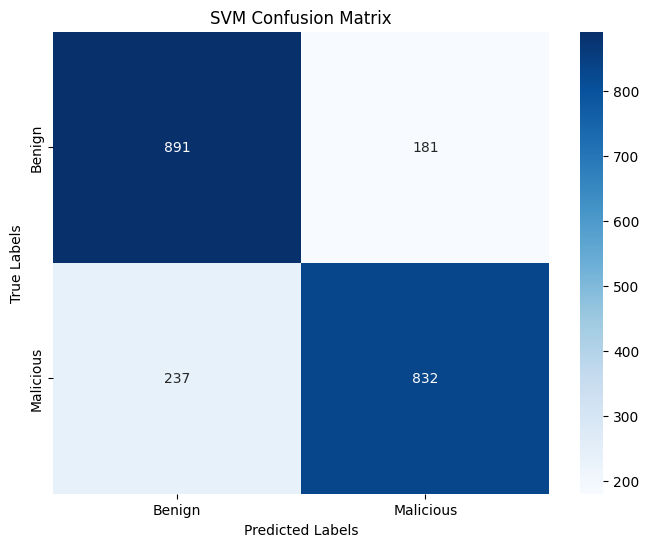

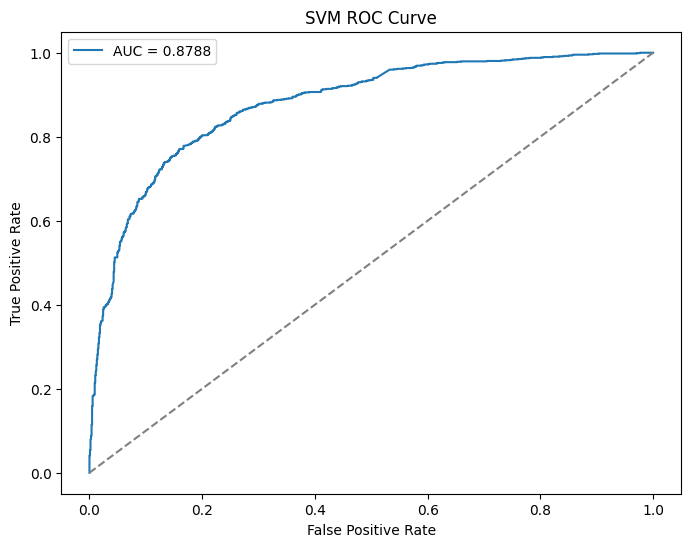

Train Accuracy: 0.98738612
Validation Accuracy: 0.81877627
Test Accuracy: 0.80476413
Precision: 0.80558619
Recall: 0.80476413
F1 Score: 0.80462330
ROC AUC: 0.87875490
Cohen's Kappa: 0.60949887
Training Time (s): 186.58382344
Validation Time (s): 3.66326594
Test Time (s): 3.88050628
Model saved at: SVM_best_model_ngrams.pkl


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import (
    accuracy_score, confusion_matrix, roc_auc_score, roc_curve,
    precision_recall_fscore_support, cohen_kappa_score
)
import matplotlib.pyplot as plt
import seaborn as sns
import time
import joblib

# Load dataset
file_path = 'D:/Final Version/Step 14 CombinedTraces/CombinedDataset/FinalCombinedBenignMaliciousDataset-v2.csv'
data = pd.read_csv(file_path)

# Define all pattern columns including advanced patterns
all_pattern_columns = ['State_Transition_Counts',
                       'Unique_LADDR_Count',
                       'Unique_RADDR_Count',
                       'Unique_LPORT_Count',
                       'Unique_RPORT_Count'
                      ]

# Combining all pattern columns into a single text feature for N-gram analysis
data['Combined_Patterns'] = data[all_pattern_columns].fillna('').astype(str).agg(' '.join, axis=1)

# Target variable
X = data['Combined_Patterns']
y = data['Level']

# Applying N-gram feature extraction with bi-grams and tri-grams
vectorizer = CountVectorizer(ngram_range=(2, 3))
X_ngram = vectorizer.fit_transform(X)

# Split the data
X_train, X_temp, y_train, y_temp = train_test_split(X_ngram, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Initialize SVM model with probability=True for AUC/ROC calculations
svm_model = SVC(kernel='linear', probability=True, random_state=42)

# Train the model and record training time
start_train_time = time.time()
svm_model.fit(X_train, y_train)
train_time = time.time() - start_train_time

# Predictions
y_train_pred = svm_model.predict(X_train)
y_val_pred = svm_model.predict(X_val)
y_test_pred = svm_model.predict(X_test)

# Calculate accuracies
train_acc = accuracy_score(y_train, y_train_pred)
val_acc = accuracy_score(y_val, y_val_pred)
test_acc = accuracy_score(y_test, y_test_pred)

# Calculate AUC for test set
y_test_prob = svm_model.predict_proba(X_test)[:, 1]
test_auc = roc_auc_score(y_test, y_test_prob)

# Confusion matrix and metrics
conf_matrix = confusion_matrix(y_test, y_test_pred)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_test_pred, average='weighted')
kappa = cohen_kappa_score(y_test, y_test_pred)

# Record validation and test times
start_val_time = time.time()
svm_model.predict(X_val)
val_time = time.time() - start_val_time

start_test_time = time.time()
svm_model.predict(X_test)
test_time = time.time() - start_test_time

# Save the model
model_path = 'SVM_best_model_ngrams.pkl'
joblib.dump(svm_model, model_path)

# Visualizations and saving plots
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malicious'], yticklabels=['Benign', 'Malicious'])
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.savefig('SVM Confusion Matrix.png')  # Save the plot
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_test_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {test_auc:.4f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('SVM ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.savefig('SVM ROC Curve.png')  # Save the plot
plt.show()

# Print metrics
metrics = {
    "Train Accuracy": train_acc,
    "Validation Accuracy": val_acc,
    "Test Accuracy": test_acc,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1,
    "ROC AUC": test_auc,
    "Cohen's Kappa": kappa,
    "Training Time (s)": train_time,
    "Validation Time (s)": val_time,
    "Test Time (s)": test_time,
}
for metric, value in metrics.items():
    print(f"{metric}: {value:.8f}")

print(f"Model saved at: {model_path}")


## LR PatternTraces

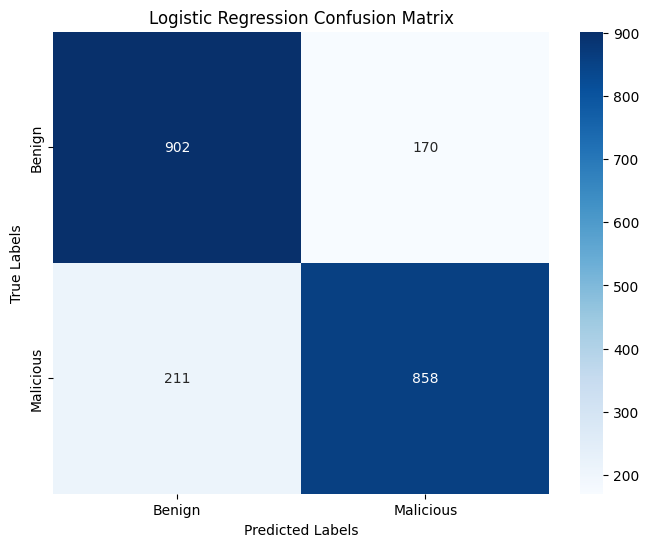

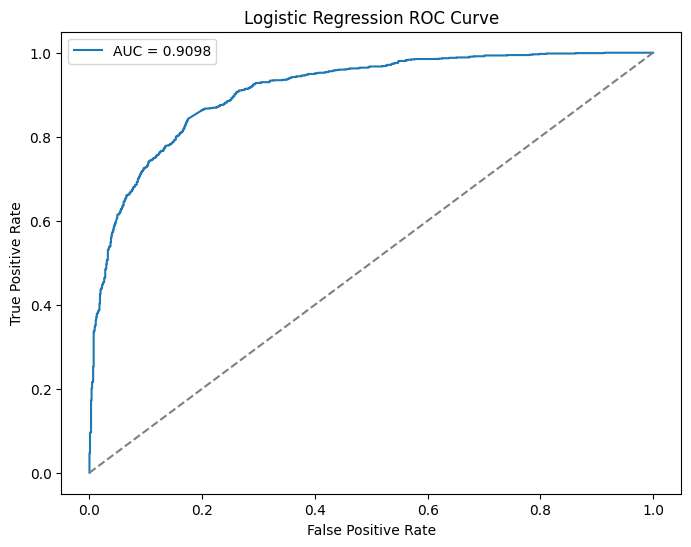

Train Accuracy: 0.98368205
Validation Accuracy: 0.83932742
Test Accuracy: 0.82204577
Precision: 0.82250936
Recall: 0.82204577
F1 Score: 0.82197571
ROC AUC: 0.90984041
Cohen's Kappa: 0.64407175
Training Time (s): 2.29170465
Validation Time (s): 0.00100231
Test Time (s): 0.00000000
Model saved at: LR_best_model_ngrams.pkl


In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import (
    accuracy_score, confusion_matrix, roc_auc_score, roc_curve,
    precision_recall_fscore_support, cohen_kappa_score
)
import matplotlib.pyplot as plt
import seaborn as sns
import time
import joblib

# Load dataset
file_path = 'D:/Final Version/Step 14 CombinedTraces/CombinedDataset/FinalCombinedBenignMaliciousDataset-v2.csv'
data = pd.read_csv(file_path)

# Define all pattern columns including advanced patterns
all_pattern_columns = ['State_Transition_Counts',
                       'Unique_LADDR_Count',
                       'Unique_RADDR_Count',
                       'Unique_LPORT_Count',
                       'Unique_RPORT_Count'
                      ]

# Combining all pattern columns into a single text feature for N-gram analysis
data['Combined_Patterns'] = data[all_pattern_columns].fillna('').astype(str).agg(' '.join, axis=1)

# Target variable
X = data['Combined_Patterns']
y = data['Level']

# Applying N-gram feature extraction with bi-grams and tri-grams
vectorizer = CountVectorizer(ngram_range=(2, 3))
X_ngram = vectorizer.fit_transform(X)

# Split the data
X_train, X_temp, y_train, y_temp = train_test_split(X_ngram, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Initialize Logistic Regression model
lr_model = LogisticRegression(random_state=42, max_iter=1000)

# Train the model and record training time
start_train_time = time.time()
lr_model.fit(X_train, y_train)
train_time = time.time() - start_train_time

# Predictions
y_train_pred = lr_model.predict(X_train)
y_val_pred = lr_model.predict(X_val)
y_test_pred = lr_model.predict(X_test)

# Calculate accuracies
train_acc = accuracy_score(y_train, y_train_pred)
val_acc = accuracy_score(y_val, y_val_pred)
test_acc = accuracy_score(y_test, y_test_pred)

# Calculate AUC for test set
y_test_prob = lr_model.predict_proba(X_test)[:, 1]
test_auc = roc_auc_score(y_test, y_test_prob)

# Confusion matrix and metrics
conf_matrix = confusion_matrix(y_test, y_test_pred)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_test_pred, average='weighted')
kappa = cohen_kappa_score(y_test, y_test_pred)

# Record validation and test times
start_val_time = time.time()
lr_model.predict(X_val)
val_time = time.time() - start_val_time

start_test_time = time.time()
lr_model.predict(X_test)
test_time = time.time() - start_test_time

# Save the model
model_path = 'LR_best_model_ngrams.pkl'
joblib.dump(lr_model, model_path)

# Visualizations and saving plots
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malicious'], yticklabels=['Benign', 'Malicious'])
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.savefig('Logistic Regression Confusion Matrix.png')  # Save the plot
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_test_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {test_auc:.4f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('Logistic Regression ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.savefig('Logistic Regression ROC Curve.png')  # Save the plot
plt.show()

# Print metrics
metrics = {
    "Train Accuracy": train_acc,
    "Validation Accuracy": val_acc,
    "Test Accuracy": test_acc,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1,
    "ROC AUC": test_auc,
    "Cohen's Kappa": kappa,
    "Training Time (s)": train_time,
    "Validation Time (s)": val_time,
    "Test Time (s)": test_time,
}
for metric, value in metrics.items():
    print(f"{metric}: {value:.8f}")

print(f"Model saved at: {model_path}")


## KNN Pattern Traces

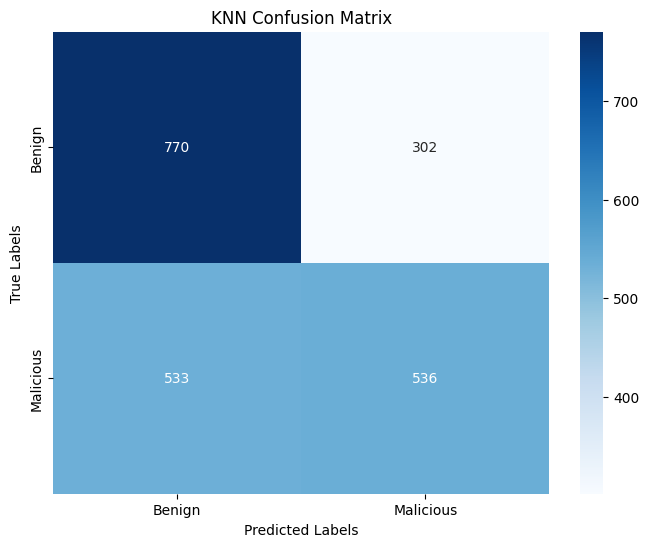

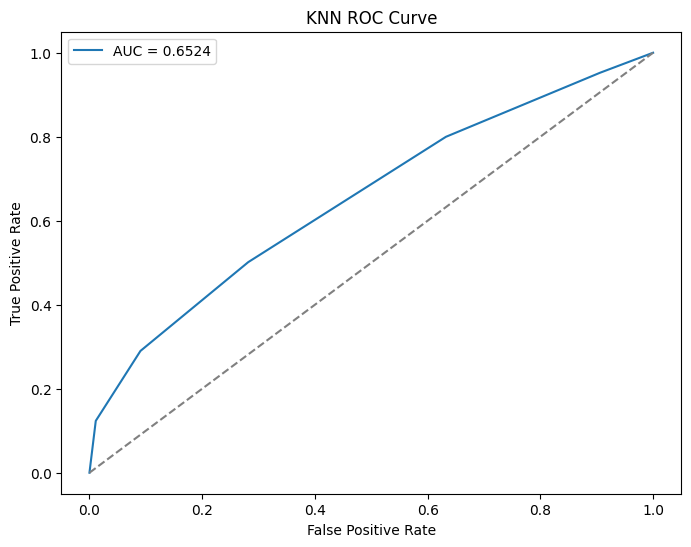

Train Accuracy: 0.75693263
Validation Accuracy: 0.60765997
Test Accuracy: 0.60999533
Precision: 0.61524696
Recall: 0.60999533
F1 Score: 0.60534072
ROC AUC: 0.65236377
Cohen's Kappa: 0.21975321
Training Time (s): 0.00500178
Validation Time (s): 1.00878835
Test Time (s): 0.95569921
Model saved at: KNN_best_model_ngrams.pkl


In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import (
    accuracy_score, confusion_matrix, roc_auc_score, roc_curve,
    precision_recall_fscore_support, cohen_kappa_score
)
import matplotlib.pyplot as plt
import seaborn as sns
import time
import joblib

# Load dataset
file_path = 'D:/Final Version/Step 14 CombinedTraces/CombinedDataset/FinalCombinedBenignMaliciousDataset-v2.csv'
data = pd.read_csv(file_path)

# Define all pattern columns including advanced patterns
all_pattern_columns = ['State_Transition_Counts',
                       'Unique_LADDR_Count',
                       'Unique_RADDR_Count',
                       'Unique_LPORT_Count',
                       'Unique_RPORT_Count'
                      ]

# Combining all pattern columns into a single text feature for N-gram analysis
data['Combined_Patterns'] = data[all_pattern_columns].fillna('').astype(str).agg(' '.join, axis=1)

# Target variable
X = data['Combined_Patterns']
y = data['Level']

# Applying N-gram feature extraction with bi-grams and tri-grams
vectorizer = CountVectorizer(ngram_range=(2, 3))
X_ngram = vectorizer.fit_transform(X)

# Split the data
X_train, X_temp, y_train, y_temp = train_test_split(X_ngram, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Initialize KNN model with k=5
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train the model and record training time
start_train_time = time.time()
knn_model.fit(X_train, y_train)
train_time = time.time() - start_train_time

# Predictions
y_train_pred = knn_model.predict(X_train)
y_val_pred = knn_model.predict(X_val)
y_test_pred = knn_model.predict(X_test)

# Calculate accuracies
train_acc = accuracy_score(y_train, y_train_pred)
val_acc = accuracy_score(y_val, y_val_pred)
test_acc = accuracy_score(y_test, y_test_pred)

# Calculate AUC for test set
y_test_prob = knn_model.predict_proba(X_test)[:, 1]
test_auc = roc_auc_score(y_test, y_test_prob)

# Confusion matrix and metrics
conf_matrix = confusion_matrix(y_test, y_test_pred)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_test_pred, average='weighted')
kappa = cohen_kappa_score(y_test, y_test_pred)

# Record validation and test times
start_val_time = time.time()
knn_model.predict(X_val)
val_time = time.time() - start_val_time

start_test_time = time.time()
knn_model.predict(X_test)
test_time = time.time() - start_test_time

# Save the model
model_path = 'KNN_best_model_ngrams.pkl'
joblib.dump(knn_model, model_path)

# Visualizations and saving plots
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malicious'], yticklabels=['Benign', 'Malicious'])
plt.title('KNN Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.savefig('KNN Confusion Matrix.png')  # Save the plot
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_test_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {test_auc:.4f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('KNN ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.savefig('KNN ROC Curve.png')  # Save the plot
plt.show()

# Print metrics
metrics = {
    "Train Accuracy": train_acc,
    "Validation Accuracy": val_acc,
    "Test Accuracy": test_acc,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1,
    "ROC AUC": test_auc,
    "Cohen's Kappa": kappa,
    "Training Time (s)": train_time,
    "Validation Time (s)": val_time,
    "Test Time (s)": test_time,
}
for metric, value in metrics.items():
    print(f"{metric}: {value:.8f}")

print(f"Model saved at: {model_path}")


## GB Pattern Traces

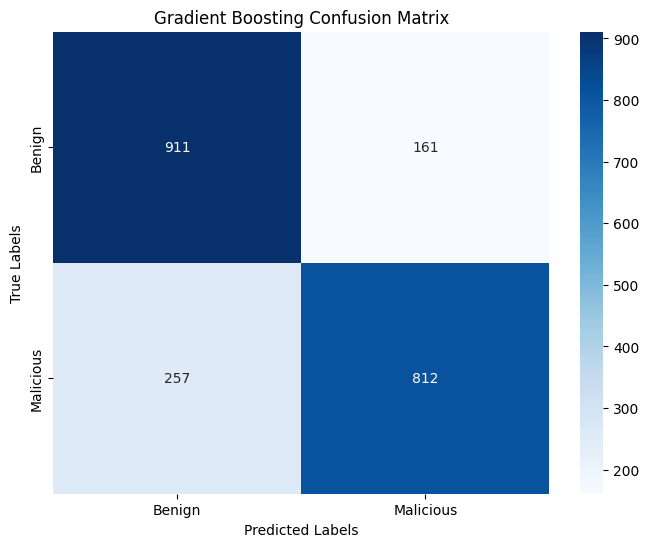

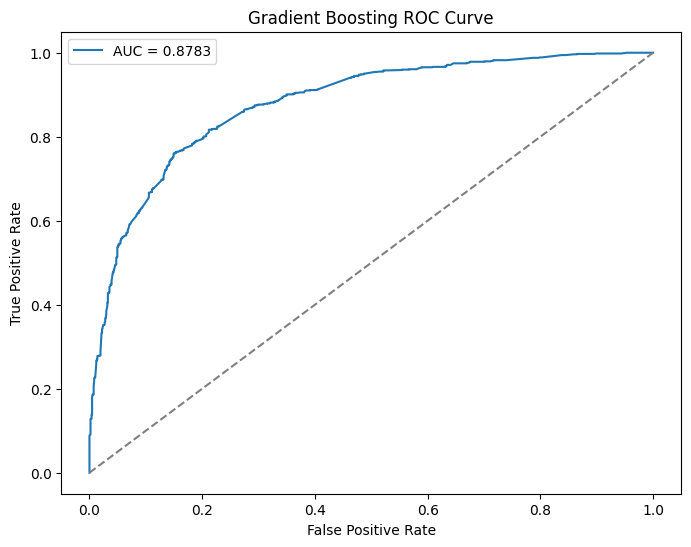

Train Accuracy: 0.81209330
Validation Accuracy: 0.79822513
Test Accuracy: 0.80476413
Precision: 0.80721083
Recall: 0.80476413
F1 Score: 0.80435847
ROC AUC: 0.87828674
Cohen's Kappa: 0.60947842
Training Time (s): 148.09792733
Validation Time (s): 0.00645208
Test Time (s): 0.00708818
Model saved at: GB_best_model_ngrams.pkl


In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import (
    accuracy_score, confusion_matrix, roc_auc_score, roc_curve,
    precision_recall_fscore_support, cohen_kappa_score
)
import matplotlib.pyplot as plt
import seaborn as sns
import time
import joblib

# Load dataset
file_path = 'D:/Final Version/Step 14 CombinedTraces/CombinedDataset/FinalCombinedBenignMaliciousDataset-v2.csv'
data = pd.read_csv(file_path)

# Define all pattern columns including advanced patterns
all_pattern_columns = ['State_Transition_Counts',
                       'Unique_LADDR_Count',
                       'Unique_RADDR_Count',
                       'Unique_LPORT_Count',
                       'Unique_RPORT_Count'
                      ]

# Combining all pattern columns into a single text feature for N-gram analysis
data['Combined_Patterns'] = data[all_pattern_columns].fillna('').astype(str).agg(' '.join, axis=1)

# Target variable
X = data['Combined_Patterns']
y = data['Level']

# Applying N-gram feature extraction with bi-grams and tri-grams
vectorizer = CountVectorizer(ngram_range=(2, 3))
X_ngram = vectorizer.fit_transform(X)

# Split the data
X_train, X_temp, y_train, y_temp = train_test_split(X_ngram, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Initialize Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)

# Train the model and record training time
start_train_time = time.time()
gb_model.fit(X_train, y_train)
train_time = time.time() - start_train_time

# Predictions
y_train_pred = gb_model.predict(X_train)
y_val_pred = gb_model.predict(X_val)
y_test_pred = gb_model.predict(X_test)

# Calculate accuracies
train_acc = accuracy_score(y_train, y_train_pred)
val_acc = accuracy_score(y_val, y_val_pred)
test_acc = accuracy_score(y_test, y_test_pred)

# Calculate AUC for test set
y_test_prob = gb_model.predict_proba(X_test)[:, 1]
test_auc = roc_auc_score(y_test, y_test_prob)

# Confusion matrix and metrics
conf_matrix = confusion_matrix(y_test, y_test_pred)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_test_pred, average='weighted')
kappa = cohen_kappa_score(y_test, y_test_pred)

# Record validation and test times
start_val_time = time.time()
gb_model.predict(X_val)
val_time = time.time() - start_val_time

start_test_time = time.time()
gb_model.predict(X_test)
test_time = time.time() - start_test_time

# Save the model
model_path = 'GB_best_model_ngrams.pkl'
joblib.dump(gb_model, model_path)

# Visualizations and saving plots
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malicious'], yticklabels=['Benign', 'Malicious'])
plt.title('Gradient Boosting Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.savefig('Gradient Boosting Confusion Matrix.png')  # Save the plot
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_test_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {test_auc:.4f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('Gradient Boosting ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.savefig('Gradient Boosting ROC Curve.png')  # Save the plot
plt.show()

# Print metrics
metrics = {
    "Train Accuracy": train_acc,
    "Validation Accuracy": val_acc,
    "Test Accuracy": test_acc,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1,
    "ROC AUC": test_auc,
    "Cohen's Kappa": kappa,
    "Training Time (s)": train_time,
    "Validation Time (s)": val_time,
    "Test Time (s)": test_time,
}
for metric, value in metrics.items():
    print(f"{metric}: {value:.8f}")

print(f"Model saved at: {model_path}")


In [18]:
# Updated metrics for new data
updated_metrics = {
    "Model": ["Random Forest", "Decision Tree", "SVM", "Logistic Regression", "KNN", "Gradient Boosting"],
    "Train Accuracy": [0.98868756, 0.98868756, 0.98738612, 0.98368205, 0.75693263, 0.81209330],
    "Validation Accuracy": [0.84913592, 0.82671649, 0.81877627, 0.83932742, 0.60765997, 0.79822513],
    "Test Accuracy": [0.83745913, 0.81130313, 0.80476413, 0.82204577, 0.60999533, 0.80476413],
    "Precision": [0.83749071, 0.81211054, 0.80558619, 0.82250936, 0.61524696, 0.80721083],
    "Recall": [0.83745913, 0.81130313, 0.80476413, 0.82204577, 0.60999533, 0.80476413],
    "F1 Score": [0.83745665, 0.81118970, 0.80462330, 0.82197571, 0.60534072, 0.80435847],
    "ROC AUC": [0.91845933, 0.82001286, 0.87875490, 0.90984041, 0.65236377, 0.87828674],
    "Cohen's Kappa": [0.67492188, 0.62263219, 0.60949887, 0.64407175, 0.58975321, 0.60947842],
    "Training Time (s)": [20.17818379, 6.54927444, 186.58382344, 2.29170465, 0.00500178, 148.09792733],
    "Validation Time (s)": [0.07911730, 0.00398946, 3.66326594, 0.00100231, 1.00878835, 0.00645208],
    "Test Time (s)": [0.08625221, 0.00401139, 3.88050628, 0.00000000, 0.95569921, 0.00708818],
}

# Convert the dictionary to a DataFrame
updated_results_df = pd.DataFrame(updated_metrics)

# Save the DataFrame to a CSV file
updated_csv_file_path = "model_comparison_results.csv"
updated_results_df.to_csv(updated_csv_file_path, index=False)
updated_results_df

,Model,Train Accuracy,Validation Accuracy,Test Accuracy,Precision,Recall,F1 Score,ROC AUC,Cohen's Kappa,Training Time (s),Validation Time (s),Test Time (s)
0,Random Forest,0.988688,0.849136,0.837459,0.837491,0.837459,0.837457,0.918459,0.674922,20.178184,0.079117,0.086252
1,Decision Tree,0.988688,0.826716,0.811303,0.812111,0.811303,0.811190,0.820013,0.622632,6.549274,0.003989,0.004011
2,SVM,0.987386,0.818776,0.804764,0.805586,0.804764,0.804623,0.878755,0.609499,186.583823,3.663266,3.880506
3,Logistic Regression,0.983682,0.839327,0.822046,0.822509,0.822046,0.821976,0.909840,0.644072,2.291705,0.001002,0.000000
4,KNN,0.756933,0.607660,0.609995,0.615247,0.609995,0.605341,0.652364,0.589753,0.005002,1.008788,0.955699
5,Gradient Boosting,0.812093,0.798225,0.804764,0.807211,0.804764,0.804358,0.878287,0.609478,148.097927,0.006452,0.007088


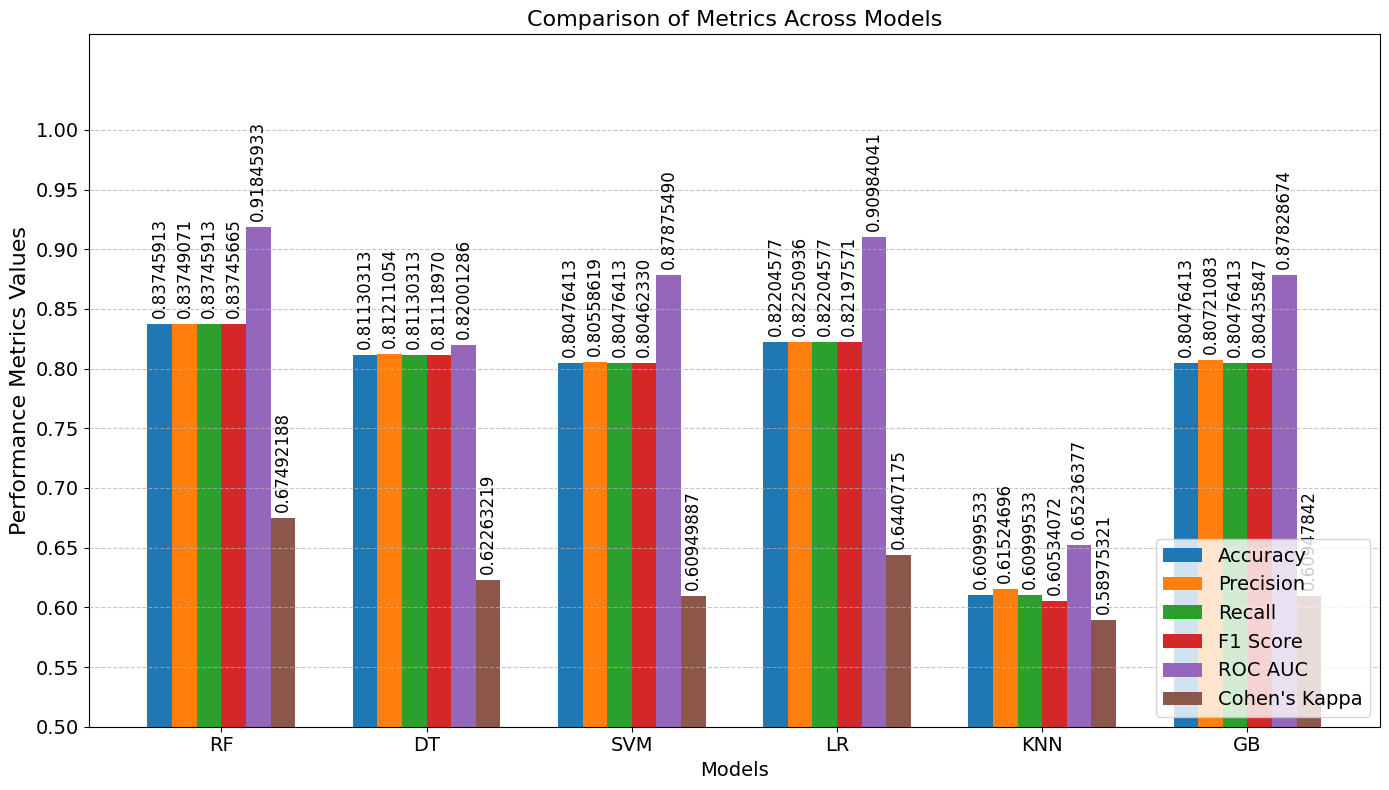

In [19]:
# Re-importing necessary libraries and re-defining the data
import matplotlib.pyplot as plt
import numpy as np

# Data
metrics = {
    "Accuracy": [0.83745913, 0.81130313, 0.80476413, 0.82204577, 0.60999533, 0.80476413],
    "Precision": [0.83749071, 0.81211054, 0.80558619, 0.82250936, 0.61524696, 0.80721083],
    "Recall": [0.83745913, 0.81130313, 0.80476413, 0.82204577, 0.60999533, 0.80476413],
    "F1 Score": [0.83745665, 0.81118970, 0.80462330, 0.82197571, 0.60534072, 0.80435847],
    "ROC AUC": [0.91845933, 0.82001286, 0.87875490, 0.90984041, 0.65236377, 0.87828674],
    "Cohen's Kappa": [0.67492188, 0.62263219, 0.60949887, 0.64407175, 0.58975321, 0.60947842],
}
models = ["RF", "DT", "SVM", "LR", "KNN", "GB"]

# Bar width and positions
bar_width = 0.12
x = np.arange(len(models))
fig, ax = plt.subplots(figsize=(14, 8))

# Plotting bars for each metric
for i, (metric, values) in enumerate(metrics.items()):
    bars = ax.bar(x + i * bar_width, values, bar_width, label=metric)
    # Adding numerical values to each bar (vertically)
    for bar, value in zip(bars, values):
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.005, f"{value:.8f}", 
                ha='center', va='bottom', rotation=90, fontsize=12)

# Customizing the plot
ax.set_xticks(x + bar_width * (len(metrics) - 1) / 2)
ax.set_xticklabels(models, rotation=0, fontsize=14)
ax.set_title("Comparison of Metrics Across Models", fontsize=16)
ax.set_ylabel("Performance Metrics Values", fontsize=16)  # Increased Y-axis font size
ax.set_xlabel("Models", fontsize=14)
ax.legend(loc="lower right", fontsize=14)
ax.grid(axis="y", linestyle="--", alpha=0.7)

# Setting the Y-axis to start from 0.5 with intervals of 0.05
ax.set_ylim(0.5, 1.08)
ax.set_yticks(np.arange(0.5, 1.05, 0.05))
ax.tick_params(axis='y', labelsize=14)  # Y-axis tick font size set to 14

# Adjust layout and show plot
plt.tight_layout()
plt.savefig('Comparison of Metrics Across Models.png')  # Save the plot
plt.show()